[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW4.ipynb)

# Stat 220 — Homework 4:

**Instructions**
- Answer all questions. Show all work for full credit.
- Use Python (NumPy/Matplotlib/SciPy) to compute values and make plots.
- When a plot is requested, label axes and include a legend.
- You may add cells as needed.

In [2]:

# Feel free to add any imports you want here.
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, binom

## Data (used in Q1–Q4)
We use this small dataset throughout Questions 1–4:

In [3]:

x = np.array([1.1, 3.4, 5.7, 1.9, 2.3, 4.1, 0.9, 1.6, 2.4, 0.5], dtype=float)
n = len(x)
x


array([1.1, 3.4, 5.7, 1.9, 2.3, 4.1, 0.9, 1.6, 2.4, 0.5])

## Question 1 — Likelihood Function Practice

You are given the dataset:
\[
x = (1.1, 3.4, 5.7, 1.9, 2.3, 4.1, 0.9, 1.6, 2.4, 0.5).
\]



**(a)** Derive the **likelihood function**  if the data are assumed to come from an **Exponential($\lambda$)** distribution **with fixed $\lambda = 0.5$**. Then **evaluate** the likelihood at the given data.

The likelihood function of an exponential distribution is given by 𝜆^n * e^-(sum(data_X)*𝜆)

In [14]:
sum_x = sum(x)
𝜆 = 0.5

likelihood = (𝜆**n)*np.exp(-sum_x*𝜆)
print(f"likelihood of dataset given assumed as an Exponential distribution with a fixed 𝜆 of .5 is {likelihood}")

likelihood of dataset given assumed as an Exponential distribution with a fixed 𝜆 of .5 is 6.307844586963343e-09


**(b)** Derive the likelihood function if the data are assumed to come from a **Normal($\mu,\sigma^2$)** distribution **with fixed $\mu = 2$, $\sigma = 1$**. Then **evaluate** that likelihood at the data.

The likelihood function of normal distribution is given by (2*pi*σ^2)^(-n/2) * exp((-1/(2*σ^2)) * (sum_x(data_x - μ)^2) (with normalization constant)

In [15]:
mu=2
sigma=1

inner_summation = 0
for i in range(len(x)):
  inner_summation += (x[i] - mu)**2

In [17]:
likelihood = (2 * np.pi * sigma**2)**(-n/2) * np.exp((-1/(2*sigma**2)) * inner_summation)
print(f"likelihood of dataset given assumed as an Normal distribution with fixed 𝜇=2,𝜎=1 is {likelihood}")

likelihood of dataset given assumed as an Normal distribution with fixed 𝜇=2,𝜎=1 is 4.3122749603719213e-10


## Question 2

Assume the data are i.i.d. **Normal($\mu,\sigma^2$)** with both $\mu$ and $\sigma^2$ **unknown**.



**(a)** Compute these MLEs for $\mu$ and $\sigma$ for the dataset.  


MLE expected mean and variance for a normal distribution is given by:
mean = average_of_given_data
variance = 1/n * (sum((x_i-x_avg)^2))

In [21]:
mean = sum_x/n

summation = 0
for i in range(n):
  summation += (x[i]- mean)**2

variance = 1/n * sum((x-mean)**2)

print(f"mean of dataset is {mean} and variance of dataset is {variance}")

mean of dataset is 2.3899999999999997 and variance of dataset is 2.3229


**(b)** Plot a **histogram** of the data with the **fitted Normal density** overlaid.

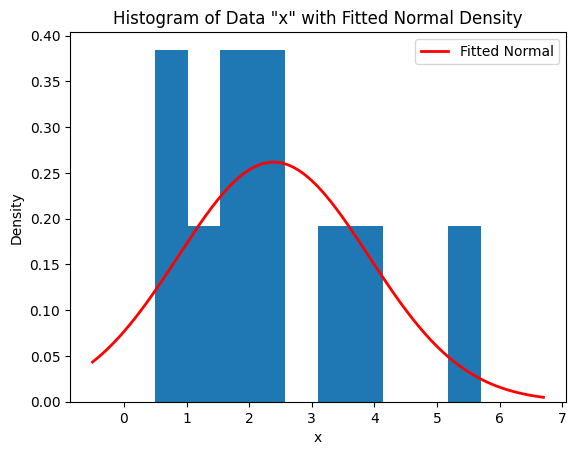

In [28]:
plt.hist(x, density=True)

x_range = np.linspace(min(x)-1, max(x)+1, 200)
pdf_values = norm.pdf(x_range, mean, np.sqrt(variance))
plt.plot(x_range, pdf_values, 'r-', linewidth=2, label='Fitted Normal')

plt.title('Histogram of Data "x" with Fitted Normal Density')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()

## Question 3

Assume the data are i.i.d. **Exponential($\lambda$)** with **unknown** rate $\lambda$.

**(c)** Compute $\hat{\lambda}$.  


𝜆̂_hat for exponential data is given as n/sum(data_x)

**(a)** Compute the MLE for $\lambda$.  


In [29]:
MLE_𝜆 = n/sum_x
print(f"MLE for 𝜆 is {MLE_𝜆}")

MLE for 𝜆 is 0.4184100418410042


**(b)** Plot a histogram of the data with the **fitted Exponential** density overlaid.

## Question 4 — Model Comparison (Visual + AIC)



**(a)** Visually compare your overlaid fits from Q2 and Q3. Which model seems better?  

**(b)** Compute **AIC** for both models using the log-likelihoods at the MLEs:
$$
\mathrm{AIC} = -2\,\ell(\hat{\theta}) + 2k,
$$
where $k$ is the number of parameters (Normal: $k=2$ for $\mu,\sigma$; Exponential: $k=1$).  

**(c)** Which model is preferred by AIC? Briefly justify.

## Question 5 — Regression under Different Losses

Consider the regression dataset (note the last point is a potential outlier):
\[
x_reg = (1,2,3,4,5,6,7,8),\quad
y_reg = (2.1, 3.9, 6.0, 8.2, 9.8, 12.1, 14.2, 30.0).
\]

We fit $y = \beta_0 + \beta_1 x$ under three losses.



**(a)** Compute $(\hat\beta_0, \hat\beta_1)$ assuming a squared error loss function.


**(b)** Compute $(\hat\beta_0, \hat\beta_1)$ assuming an absolute loss function.


**(c)** Compute $(\hat\beta_0, \hat\beta_1)$ assuming a loss function that is equal to the largest difference $y - \hat{y}$


**(d)** Plot the data with **all three** fitted lines on the same axes.  
